## را توضیح دهید sgd پنالتی ترم های  


SGD supports the following penalties: penalty="l2" : L2 norm penalty on coef_ . penalty="l1" : L1 norm penalty on coef_ . penalty="elasticnet" : Convex combination of L2 and L1; (1 - l1_ratio) * L2 + l1_ratio * L1

##  با ریدج و در جه آزادی 0.9 را امتحان کنید sgd مدل classpriceروی داده های   

In [55]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression,LinearRegression, Ridge, SGDRegressor,Lasso
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [57]:
df=pd.read_csv('classprice.csv')
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,class
0,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.4,10.0,102,5500,24,30,13950
1,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.4,8.0,115,5500,18,22,17450
2,1,158,105.8,192.7,71.4,55.7,2844,136,3.19,3.4,8.5,110,5500,19,25,17710
3,1,158,105.8,192.7,71.4,55.9,3086,131,3.13,3.4,8.3,140,5500,17,20,23875
4,2,192,101.2,176.8,64.8,54.3,2395,108,3.50,2.8,8.8,101,5800,23,29,16430


In [58]:
X = df.drop(['class'],axis=1)
y = df.filter(['class'],axis=1)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [78]:
reg = SGDRegressor(penalty='l2', alpha=0.9)

In [79]:
reg.fit(X_train, y_train)

/home/sara/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.9)

In [80]:
y_predict= reg.predict(X_test)

In [81]:
print("MSE : ", metrics.mean_squared_error(y_test, y_predict))
print("R2: ", metrics.r2_score(y_test, y_predict))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, y_predict))
print('MAE:',metrics.mean_absolute_error(y_test, y_predict))
print('RMSE:' ,np.sqrt(mean_squared_error(y_test,y_predict)))

MSE :  9.756513521253526e+32
R2:  -3.974484051942899e+25
MAPE:  3393974940327.4873
MAE: 3.115514890803413e+16
RMSE: 3.1235418231958296e+16


## حال مدل قبلی را در همان هتگامی که بهترین اکسترمم را پیدا کرد نگه دارید و نتیجه را مقایسه کنید


In [87]:
reg1 = SGDRegressor(penalty='l2', alpha=0.9,early_stopping=True)
reg1.fit(X_train, y_train)
y_predict1= reg1.predict(X_test)

/home/sara/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [88]:
print("MSE : ", metrics.mean_squared_error(y_test, y_predict1))
print("R2: ", metrics.r2_score(y_test, y_predict1))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, y_predict1))
print('MAE:',metrics.mean_absolute_error(y_test, y_predict1))
print('RMSE:' ,np.sqrt(mean_squared_error(y_test,y_predict1)))

MSE :  2.8330162178575485e+33
R2:  -1.15407801693117e+26
MAPE:  5835989495302.055
MAE: 5.313380752151349e+16
RMSE: 5.32260858776742e+16


## در حالتی  که از تمام ظرفیت پردازشیه سیستم استفاده میکنید بدون اسکیل کردن روی داده ها امتحان کنید  LinearRegression حال مدل

In [90]:
model1=LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [91]:
y_predict2= model1.predict(X_test)

print("MSE : ", metrics.mean_squared_error(y_test, y_predict2))
print("R2: ", metrics.r2_score(y_test, y_predict2))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, y_predict2))
print('MAE:',metrics.mean_absolute_error(y_test, y_predict2))
print('RMSE:' ,np.sqrt(mean_squared_error(y_test,y_predict2)))

MSE :  5912684.352456773
R2:  0.7591366053885971
MAPE:  0.16738739872122763
MAE: 1777.0470597752767
RMSE: 2431.601191078992


## حال مدل بالا را با استادارد اسکل در پایپ لاین امتحان کنید از مقایسه دو نتیجه با هم چه چیزی میفهمید علت را در بیس کد پیدا کنید

In [92]:
model = make_pipeline(preprocessing.StandardScaler(), LinearRegression())
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [93]:
y_predict3= model.predict(X_test)

print("MSE : ", metrics.mean_squared_error(y_test, y_predict3))
print("R2: ", metrics.r2_score(y_test, y_predict3))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, y_predict3))
print('MAE:',metrics.mean_absolute_error(y_test, y_predict3))
print('RMSE:' ,np.sqrt(mean_squared_error(y_test,y_predict3)))

MSE :  5912684.352456806
R2:  0.7591366053885956
MAPE:  0.16738739872122876
MAE: 1777.0470597752858
RMSE: 2431.601191078999


## روی داده های تایتانیک اعمال کنید امتحان کنید  LinearRegression حال مدل

In [123]:
df1=pd.read_csv('titanic.csv')
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

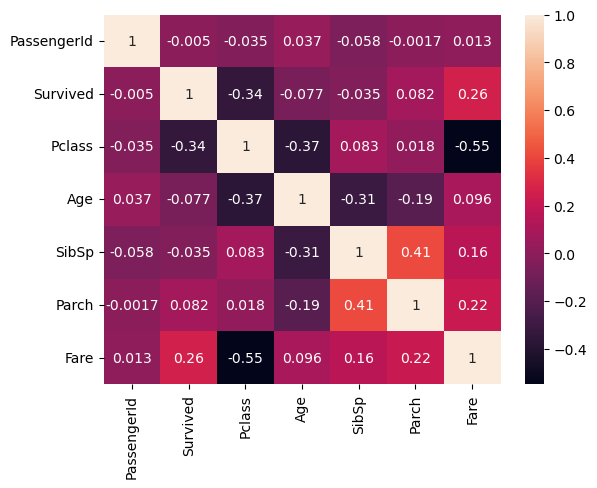

In [124]:
sns.heatmap(df1.corr(),annot=True)

In [125]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [126]:
df1=df1.drop(['Name','Ticket','Cabin'],axis=1)
df1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


## filling nan values

In [127]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df1[['Age']])
df1[['Age']]= imputer.transform(df1[['Age']])

In [128]:
df1['Embarked'].fillna(df1['Embarked'].mode()[0], inplace=True)

In [129]:
df1.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [130]:
df1.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.000000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.000000,3.0,3.0000
Sex,891.0,0.352413,0.477990,0.00,0.0000,0.000000,1.0,1.0000
Age,891.0,29.699118,13.002015,0.42,22.0000,29.699118,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.000000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.000000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.454200,31.0,512.3292
Embarked,891.0,0.361392,0.635673,0.00,0.0000,0.000000,1.0,2.0000


In [131]:
X = df1.drop(['Survived'],axis=1)
y = df1.filter(['Survived'],axis=1)
print(y)

     Survived
0           0
1           1
2           1
3           1
4           0
..        ...
886         0
887         1
888         0
889         1
890         0

[891 rows x 1 columns]


In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [133]:
model3 = make_pipeline(preprocessing.StandardScaler(), LinearRegression())
model3.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [135]:
y_predict4= model3.predict(X_test)

In [136]:
print("MSE : ", metrics.mean_squared_error(y_test, y_predict4))
print("R2: ", metrics.r2_score(y_test, y_predict4))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, y_predict4))
print('MAE:',metrics.mean_absolute_error(y_test, y_predict4))
print('RMSE:' ,np.sqrt(mean_squared_error(y_test,y_predict4)))


MSE :  0.16104985589089002
R2:  0.3331353796071326
MAPE:  654514577382330.6
MAE: 0.3103913985153215
RMSE: 0.4013101741681738
